###Анализ регионов России


Первичный осмотр данных:

In [ ]:
# Импортируем библиотеки

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Подгружаем данные для анализа

fed_okrug =  pd.read_csv('/content/drive/MyDrive/fed_okrug.csv')  #
regions = pd.read_excel('/content/drive/MyDrive/regions_data.xlsx') # , na_values='-')
                                                                    # если дописать данную строку, то все пропуски заменятся на черточки

                                                                    # , index_col='Регион')
                                                                    # а если эту то добавятся соответствующие индексы

                                                                    # sep='\t' иногда нужно для корректной перекодировки таблицы


In [ ]:
fed_okrug.head()

,Регион,Федеральный Округ
0,Белгородская область,Центральный федеральный округ
1,Брянская область,Центральный федеральный округ
2,Владимирская область,Центральный федеральный округ
3,Воронежская область,Центральный федеральный округ
4,Ивановская область,Центральный федеральный округ


In [ ]:
regions.head()

,Субъекты Российской Федерации,X1,X2,X3,X4
0,Белгородская область,32884,7.2,9593,4.8
1,Брянская область,28636,13.6,10950,3.8
2,Владимирская область,25955,12.5,10808,4.8
3,Воронежская область,32102,8.5,9053,4.4
4,Ивановская область,26284,13.7,10581,5.7


In [ ]:
# В начале наведем небольшой порядок в названии колонок двух наших датасетов

regions.columns = (
    regions.columns     # возмем все наши колонки
    .str.lower()        # приведем к нижнему регистру
    .str.replace(' ', '_') # и заменим пробелы на нижнии подчеркивания
    )

fed_okrug.columns = (
    fed_okrug.columns # поступим по аналогии с нашим первым датасетом
    .str.lower()
    .str.replace(' ', '_')
    )

regions = regions.rename(columns={'субъекты_российской_федерации':'регион'})  # переименуем одну колонку чтобы совпадали их названия

# соединим два имеющихся датасета по нашей переименнованной колонке и поместим их в новый
our_data = fed_okrug.merge(regions, how='left', on='регион')

print(f'{regions.shape}\n{fed_okrug.shape}\n{our_data.shape} - our_data')     # проверим что у нас получилось

(87, 5)
(87, 2)
(87, 6) - our_data


In [ ]:
# Переименуем колонки и приведем их к понятным названиям

r = {'x1':'средний_доход', 'x2':'%_ниже_среднего_дохода', 'x3':'мрот', 'x4':'%_ниже_мрот'}
our_data = our_data.rename(columns=r)

r.values()

dict_values(['средний_доход', '%_ниже_среднего_дохода', 'мрот', '%_ниже_мрот'])

In [ ]:
our_data.dtypes  # Посмотрим на тип данных

регион                     object
федеральный_округ          object
средний_доход               int64
%_ниже_среднего_дохода    float64
мрот                       object
%_ниже_мрот               float64
dtype: object

In [ ]:
# посмотрим на количество пропусков в данных

our_data.isna().sum()

регион                    0
федеральный_округ         0
средний_доход             0
%_ниже_среднего_дохода    0
мрот                      0
%_ниже_мрот               0
dtype: int64

In [ ]:
our_data.info() # общая информация

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 86
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   регион                  87 non-null     object 
 1   федеральный_округ       87 non-null     object 
 2   средний_доход           87 non-null     int64  
 3   %_ниже_среднего_дохода  87 non-null     float64
 4   мрот                    87 non-null     object 
 5   %_ниже_мрот             87 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


In [ ]:
our_data['мрот'].unique() # видим что есть неявные пропуски в данных '-' и не числовой тип object

array([9593, 10950, 10808, 9053, 10581, 10964, 11010, 9997, 9828, 13169,
       10378, 10785, 10752, 10178, 11138, 10999, 10668, 17740, 14196,
       14567, '-', 21757, 13304, 11428, 12084, 11289, 17723, 11352, 11441,
       11910, 9876, 10443, 11074, 11261, 10793, 9864, 10787, 11396, 10465,
       10353, 11311, 10277, 9854, 11240, 9777, 9834, 9846, 9378, 9600,
       10314, 9804, 10844, 10710, 10372, 9760, 9610, 10962, 9631, 10306,
       10452, 10817, 15890, 16640, 11748, 11232, 10697, 10674, 11795,
       10211, 13053, 11982, 10403, 11845, 10324, 11850, 12333, 17824,
       12999, 21524, 14025, 15569, 13530, 20830, 16130, 15416, 23999],
      dtype=object)

In [ ]:
our_data['мрот'] = our_data['мрот'].replace('-', np.nan) # заменим значения на пропущенные и заодно поменяем тип данных
our_data['мрот'].unique()

array([ 9593., 10950., 10808.,  9053., 10581., 10964., 11010.,  9997.,
        9828., 13169., 10378., 10785., 10752., 10178., 11138., 10999.,
       10668., 17740., 14196., 14567.,    nan, 21757., 13304., 11428.,
       12084., 11289., 17723., 11352., 11441., 11910.,  9876., 10443.,
       11074., 11261., 10793.,  9864., 10787., 11396., 10465., 10353.,
       11311., 10277.,  9854., 11240.,  9777.,  9834.,  9846.,  9378.,
        9600., 10314.,  9804., 10844., 10710., 10372.,  9760.,  9610.,
       10962.,  9631., 10306., 10452., 10817., 15890., 16640., 11748.,
       11232., 10697., 10674., 11795., 10211., 13053., 11982., 10403.,
       11845., 10324., 11850., 12333., 17824., 12999., 21524., 14025.,
       15569., 13530., 20830., 16130., 15416., 23999.])

### Графики и первичный анализ

График сравнения мрот и среднего дохода по регионам, так же замечаем два наших пропуска:

Text(0.5, 1.0, 'Финансы')

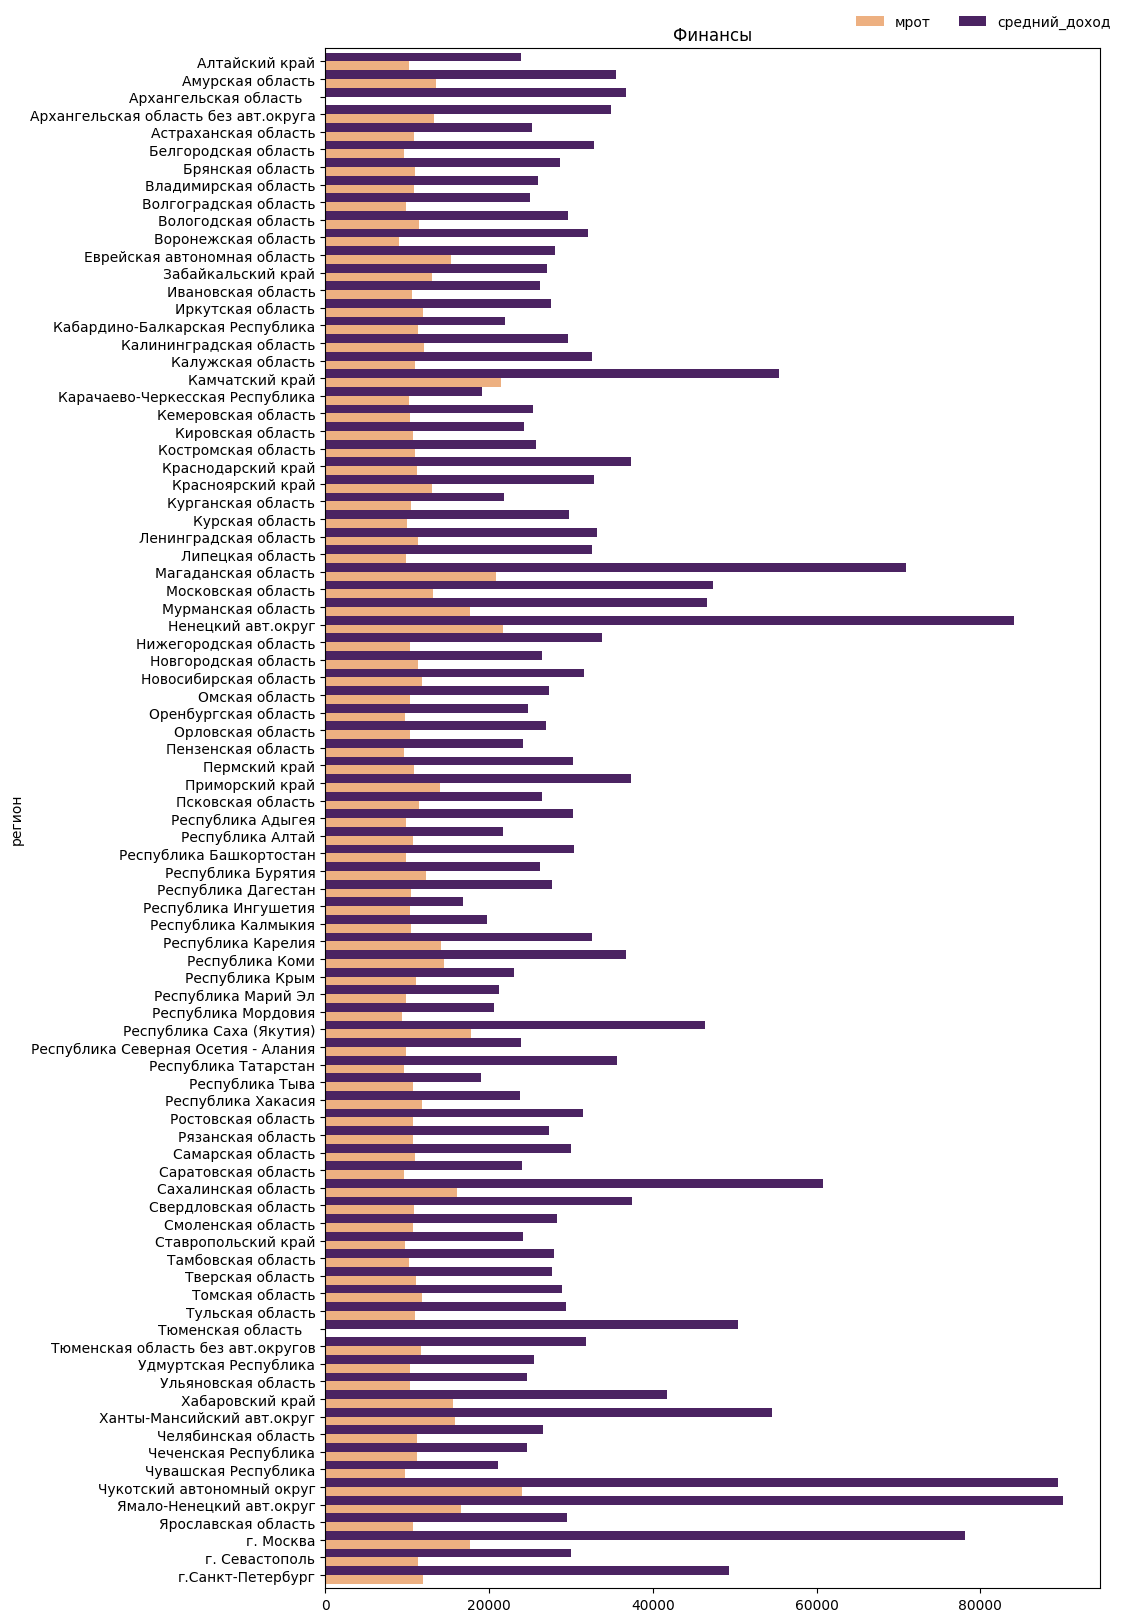

In [ ]:
(
    our_data
 .pivot_table(index='регион',
              values=['средний_доход','мрот'])
 .sort_values(by='регион',ascending=False)
 .plot(kind='barh', stacked=False, figsize=(10, 20), cmap='flare',width=1)
 .legend(loc='upper right',
         bbox_to_anchor=(1.03, 1.03), ncol=5,
         frameon=False) # Отображать ли рамку у пояснений
    )
plt.title('Финансы')

Построим тепловую карту процентов по регионам:

Text(0.5, 1.0, 'Проценты')

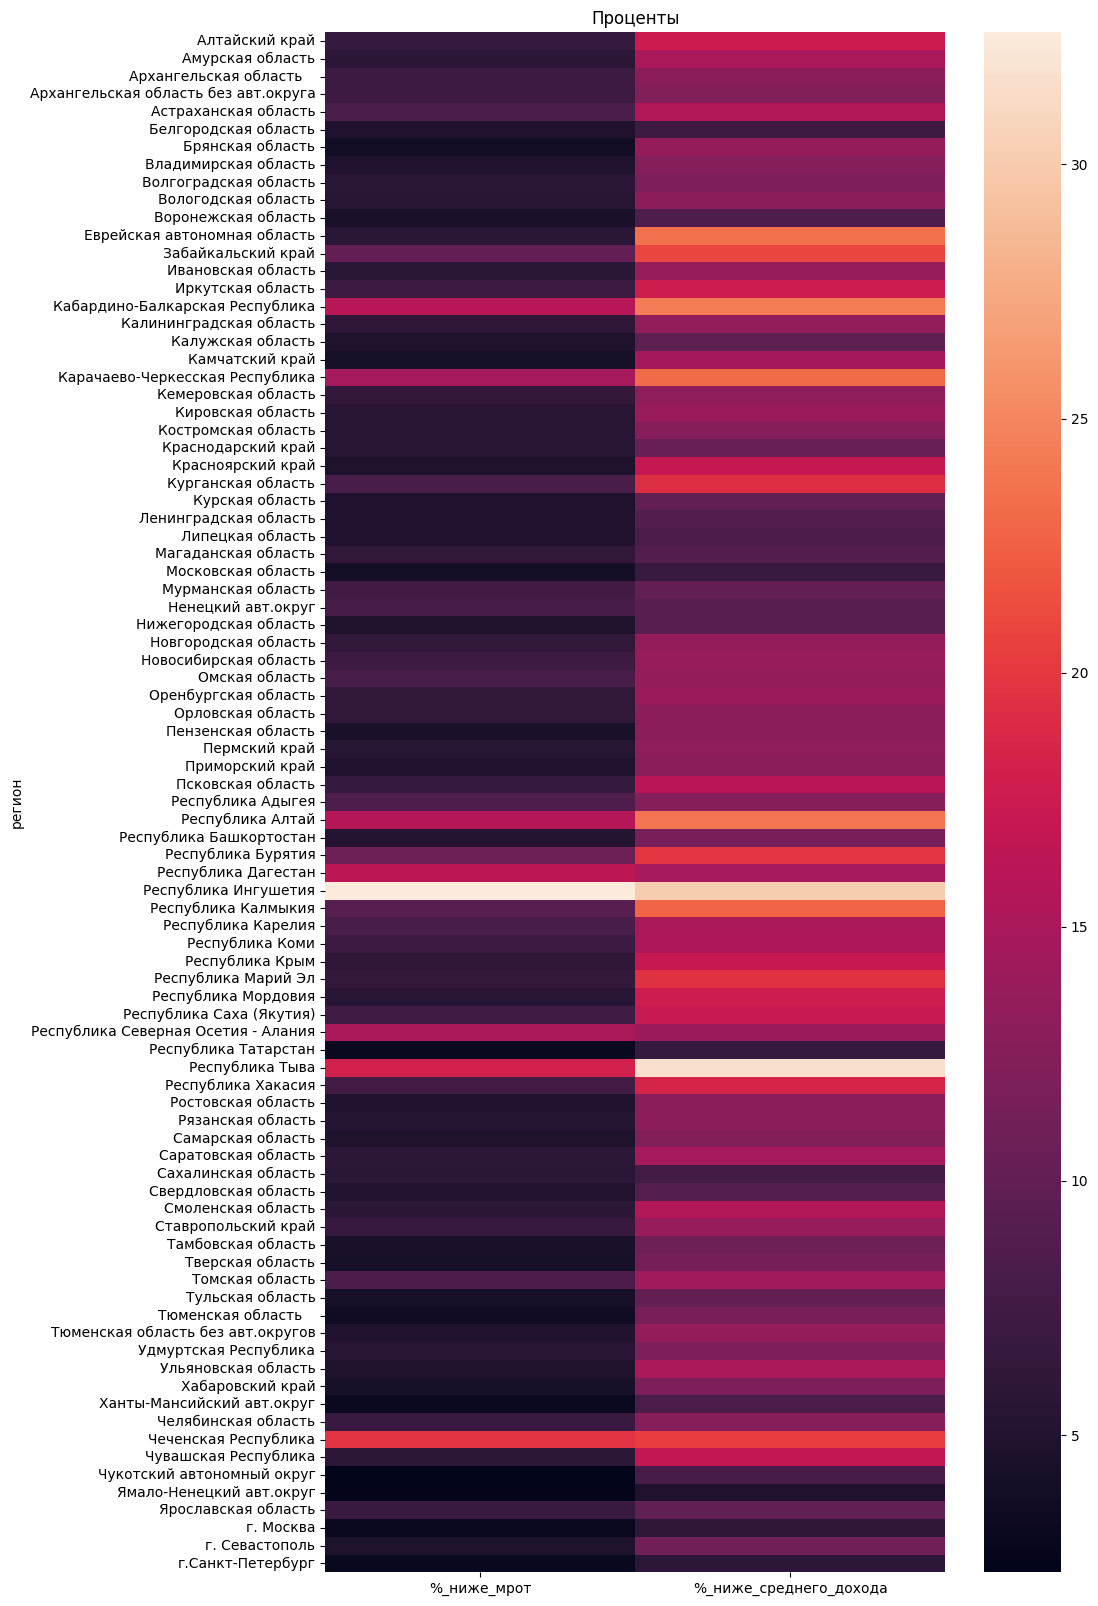

In [ ]:
plt.figure(figsize=(10, 20))
sns.heatmap(our_data.pivot_table(index='регион',values=['%_ниже_среднего_дохода', '%_ниже_мрот']))
plt.title('Проценты')

Корреляции среднего дохода регионов и центра:

In [ ]:
our_data.query('средний_доход <= 55000').corr() # regions

<ipython-input-14-efa0cdb8347d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  our_data.query('средний_доход <= 55000').corr() # regions


,средний_доход,%_ниже_среднего_дохода,мрот,%_ниже_мрот
средний_доход,1.000000,-0.604410,0.654903,-0.443533
%_ниже_среднего_дохода,-0.604410,1.000000,0.023853,0.730614
мрот,0.654903,0.023853,1.000000,-0.077596
%_ниже_мрот,-0.443533,0.730614,-0.077596,1.000000


In [ ]:
our_data.query('средний_доход >= 55000').corr() # center

<ipython-input-15-c44b6a57763e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  our_data.query('средний_доход >= 55000').corr() # center


,средний_доход,%_ниже_среднего_дохода,мрот,%_ниже_мрот
средний_доход,1.000000,-0.664323,0.158653,-0.312033
%_ниже_среднего_дохода,-0.664323,1.000000,0.538985,0.326459
мрот,0.158653,0.538985,1.000000,0.097232
%_ниже_мрот,-0.312033,0.326459,0.097232,1.000000


In [ ]:
our_data.corr() # общая кореляция

<ipython-input-16-2205a7071654>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  our_data.corr() # общая кореляция


,средний_доход,%_ниже_среднего_дохода,мрот,%_ниже_мрот
средний_доход,1.000000,-0.566906,0.846143,-0.352026
%_ниже_среднего_дохода,-0.566906,1.000000,-0.215454,0.724994
мрот,0.846143,-0.215454,1.000000,-0.166357
%_ниже_мрот,-0.352026,0.724994,-0.166357,1.000000


Так же построим паирплот для сравнения:

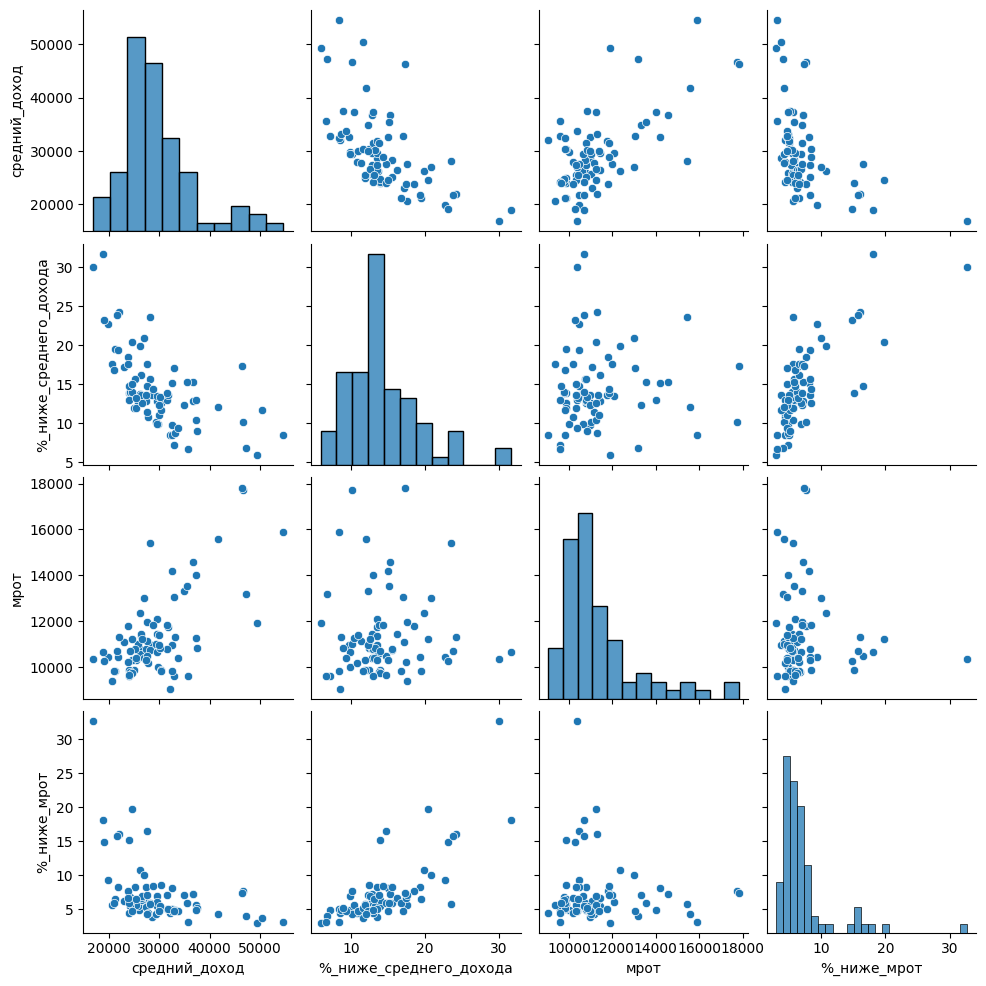

In [ ]:
sns.pairplot(our_data.query('средний_доход <= 55000')) # regions

График распределения мрот и среднего дохода по Федеральным округам:

Text(0.5, 1.0, 'Финансы')

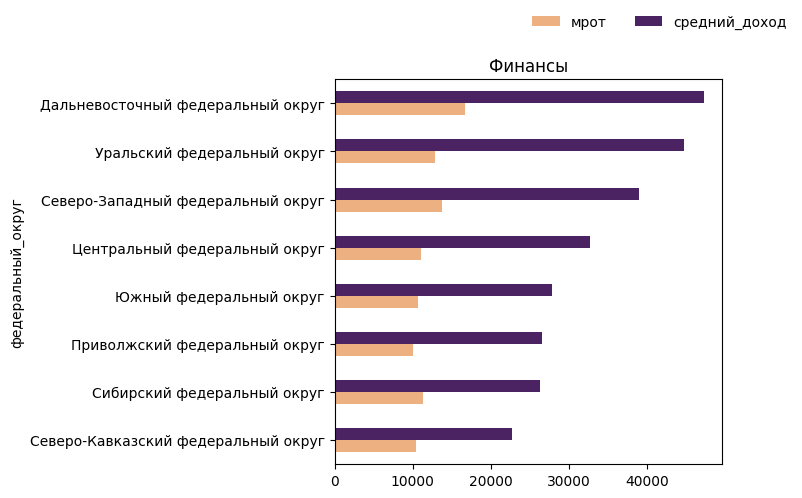

In [ ]:
(
    our_data
 .pivot_table(index='федеральный_округ',
              values=['средний_доход','мрот'],
              aggfunc='mean')
 .sort_values(by='средний_доход',ascending=True)
 .plot(kind='barh', stacked=False, figsize=(5, 5), cmap='flare')
 .legend(loc='upper right',
         bbox_to_anchor=(1.2, 1.2), ncol=5,
         frameon=False)

 )
plt.title('Финансы')

Так же проценты по федеральным округам:

Text(0.5, 1.0, 'Проценты')

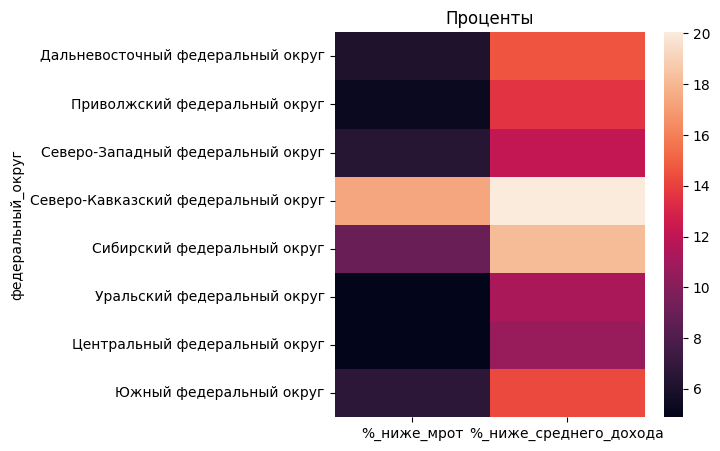

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(our_data.pivot_table(index='федеральный_округ',values=['%_ниже_среднего_дохода', '%_ниже_мрот'],aggfunc='mean'))
plt.title('Проценты')

Кластермап для визуализации зависимостей показателей по федеральным округам:

Text(0.5, 1.0, 'Кореляция')

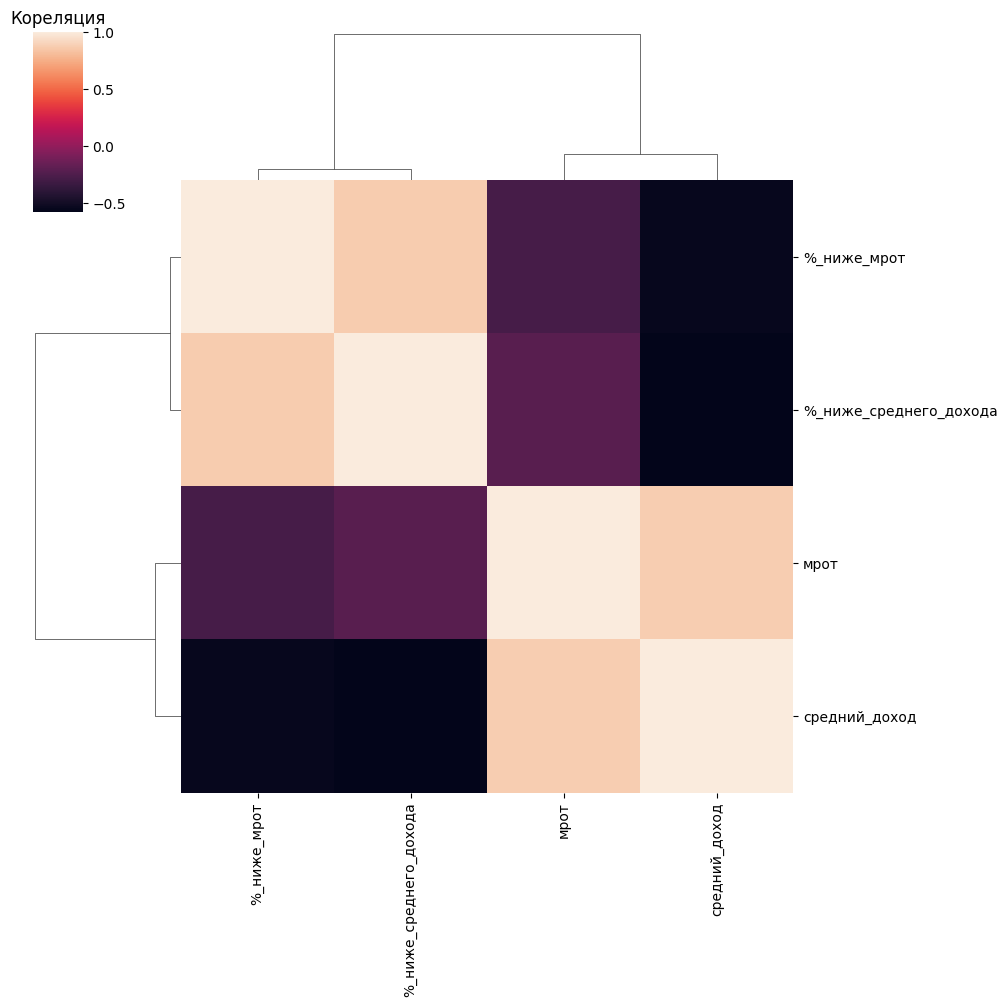

In [ ]:
sns.clustermap(our_data.pivot_table(index='федеральный_округ',values=['средний_доход','мрот','%_ниже_среднего_дохода', '%_ниже_мрот']).corr())
plt.title('Кореляция')

### Стандартизация данных:

стандартизация - берет все числовые значения признаков и перераспределяет их к среднему значению ноль с отклонением до единицы делая нормальное распределение данных

Ипортируем нужные библиотеки:

В модуле preprocessing библиотеки sklearn реализованы несколько классов стандартизации данных:

StandardScaler - приведение к нулевому среднему и единичной дисперсии(отклонению)

MinMaxScaler - Приведение данных к отрезку [0, 1]

MaxAbsScaler - Приведение к [-1, 1] (рекомендуется для разреженных данных)



!!!!!!!!!! Замечание !!!!!!!!!!!!

У этих методов есть методы аналоги scale, minmax_scale и maxabs_scale,

которые делают практически тоже самое, но для supervized задач машинного обучения, которые встретятся позже, удобнее использовать именно рассматриваемый вариант.

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
from sklearn.preprocessing import StandardScaler, scale # scale х.з. зачем импортировать

# или

#  from sklearn import preprocessing

#  stand_1 = preprocessing.StandardScaler()
#  stand_2 = preprocessing.MinMaxScaler()
#  stand_3 = preprocessing.MaxAbsScaler()

# и далее по скрипту....

In [ ]:
skaler = StandardScaler()

In [ ]:
# запишем в переменную названия колонок нашего датасета

s = list(our_data)
s

['регион',
 'федеральный_округ',
 'средний_доход',
 '%_ниже_среднего_дохода',
 'мрот',
 '%_ниже_мрот']

In [ ]:
# посмотрим на числовые колонки

our_data[s[2:]]

,средний_доход,%_ниже_среднего_дохода,мрот,%_ниже_мрот
0,32884,7.2,9593.0,4.8
1,28636,13.6,10950.0,3.8
2,25955,12.5,10808.0,4.8
3,32102,8.5,9053.0,4.4
4,26284,13.7,10581.0,5.7
...,...,...,...,...
82,35508,15.2,13530.0,5.8
83,70982,8.7,20830.0,6.3
84,60797,7.7,16130.0,5.7
85,28126,23.6,15416.0,5.7


In [ ]:
skaler.fit(our_data[s[2:]]) # стандартизируем

StandardScaler()

In [ ]:
# х.з. зачем это
skaler.scale_

array([1.48145481e+04, 4.96542012e+00, 2.98910465e+03, 4.35091619e+00])

<Axes: >

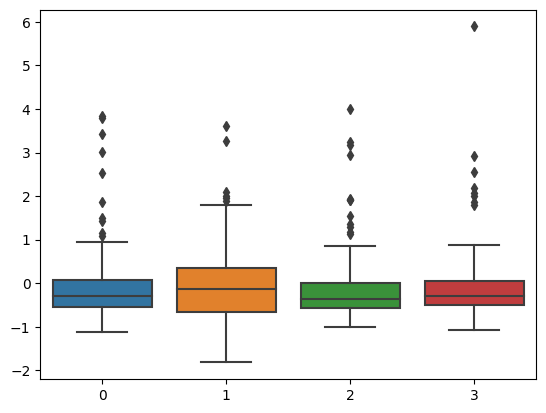

In [ ]:
# запишем наши новые полученные данные в переменную и посмотрим на них при помощи ящика с усами

skaled_data = skaler.fit_transform(our_data[s[2:]])
sns.boxplot(data=skaled_data)

##Избавимся от наших двух пропусков при помощи метода к-средних:

Импортируем интересующую библиотеку:

In [ ]:
from sklearn.impute import KNNImputer

создадим переменную и поставим три соседа:

In [ ]:
imputer = KNNImputer(n_neighbors=3)

Запихнем наши стандартизированные данные в еще одну переменную, предварительно пропустив их через импутер:

In [ ]:
imput_out = imputer.fit_transform(skaled_data)
imput_out

array([[-0.03099935, -1.33636873, -0.81775815, -0.49613015],
       [-0.31774451, -0.04745463, -0.36377606, -0.7259668 ],
       [-0.49871527, -0.26898674, -0.41128192, -0.49613015],
       [-0.0837853 , -1.07455805, -0.99841426, -0.58806481],
       [-0.47650737, -0.02731535, -0.48722439, -0.28927716],
       [-0.05293725, -0.83288666, -0.35909238, -0.51911381],
       [-0.51012298, -0.26898674, -0.34370316, -0.33524449],
       [-0.23978061, -0.79260809, -0.68260063, -0.49613015],
       [-0.05462478, -1.09469734, -0.73913929, -0.45016282],
       [ 0.94216567, -1.41692586,  0.37858671, -0.67999947],
       [-0.42885151, -0.18842961, -0.55513771, -0.15137517],
       [-0.4060361 , -0.20856889, -0.41897653, -0.38121182],
       [-0.34339498,  0.35533102, -0.43001663, -0.2662935 ],
       [-0.36796542, -0.61135455, -0.62204738, -0.58806481],
       [-0.38146566, -0.49051885, -0.30088097, -0.61104847],
       [-0.26644359, -0.75232953, -0.34738319, -0.63403214],
       [-0.25760093, -0.

Инверсируем полученную переменную(результат) через стандартскейлер:

In [ ]:
skaler.inverse_transform(imput_out)

array([[3.28840000e+04, 7.20000000e+00, 9.59300000e+03, 4.80000000e+00],
       [2.86360000e+04, 1.36000000e+01, 1.09500000e+04, 3.80000000e+00],
       [2.59550000e+04, 1.25000000e+01, 1.08080000e+04, 4.80000000e+00],
       [3.21020000e+04, 8.50000000e+00, 9.05300000e+03, 4.40000000e+00],
       [2.62840000e+04, 1.37000000e+01, 1.05810000e+04, 5.70000000e+00],
       [3.25590000e+04, 9.70000000e+00, 1.09640000e+04, 4.70000000e+00],
       [2.57860000e+04, 1.25000000e+01, 1.10100000e+04, 5.50000000e+00],
       [2.97910000e+04, 9.90000000e+00, 9.99700000e+03, 4.80000000e+00],
       [3.25340000e+04, 8.40000000e+00, 9.82800000e+03, 5.00000000e+00],
       [4.73010000e+04, 6.80000000e+00, 1.31690000e+04, 4.00000000e+00],
       [2.69900000e+04, 1.29000000e+01, 1.03780000e+04, 6.30000000e+00],
       [2.73280000e+04, 1.28000000e+01, 1.07850000e+04, 5.30000000e+00],
       [2.82560000e+04, 1.56000000e+01, 1.07520000e+04, 5.80000000e+00],
       [2.78920000e+04, 1.08000000e+01, 1.01780000e

Оборачиваем в датафрейм, где уже не будет пропусков:

In [ ]:
non_mis = pd.DataFrame(skaler.inverse_transform(imput_out))

Проверяем результат работы:

In [ ]:
non_mis.head()

,0,1,2,3
0,32884.0,7.2,9593.0,4.8
1,28636.0,13.6,10950.0,3.8
2,25955.0,12.5,10808.0,4.8
3,32102.0,8.5,9053.0,4.4
4,26284.0,13.7,10581.0,5.7


In [ ]:
non_mis.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

### Забавная функция для выявления только числовых колонок в датасете:

In [ ]:
number_col = [col for col in our_data.columns if our_data[col].dtypes != 'O']
number_col

['средний_доход', '%_ниже_среднего_дохода', 'мрот', '%_ниже_мрот']

Переименуем названия колонок в нашем новом датасете:

In [ ]:
non_mis.columns = number_col
non_mis.head()

,средний_доход,%_ниже_среднего_дохода,мрот,%_ниже_мрот
0,32884.0,7.2,9593.0,4.8
1,28636.0,13.6,10950.0,3.8
2,25955.0,12.5,10808.0,4.8
3,32102.0,8.5,9053.0,4.4
4,26284.0,13.7,10581.0,5.7


### Скопируем наш анализируемый датасет в новый(на всякий случай):

In [ ]:
our_data_clean = our_data.copy()

И подставим наши значения в интересующие нас колонки:

In [ ]:
our_data_clean[number_col] = non_mis
our_data_clean.isna().sum().sum() # еще раз убеждаемся в отсутствии пропусков

0

In [ ]:
our_data_clean.head()

,регион,федеральный_округ,средний_доход,%_ниже_среднего_дохода,мрот,%_ниже_мрот
0,Белгородская область,Центральный федеральный округ,32884.0,7.2,9593.0,4.8
1,Брянская область,Центральный федеральный округ,28636.0,13.6,10950.0,3.8
2,Владимирская область,Центральный федеральный округ,25955.0,12.5,10808.0,4.8
3,Воронежская область,Центральный федеральный округ,32102.0,8.5,9053.0,4.4
4,Ивановская область,Центральный федеральный округ,26284.0,13.7,10581.0,5.7


### Кластерный анализ:

 Иерархический кластерный анализ:

In [ ]:
our_data_clean[number_col]

,средний_доход,%_ниже_среднего_дохода,мрот,%_ниже_мрот
0,32884.0,7.2,9593.0,4.8
1,28636.0,13.6,10950.0,3.8
2,25955.0,12.5,10808.0,4.8
3,32102.0,8.5,9053.0,4.4
4,26284.0,13.7,10581.0,5.7
...,...,...,...,...
82,35508.0,15.2,13530.0,5.8
83,70982.0,8.7,20830.0,6.3
84,60797.0,7.7,16130.0,5.7
85,28126.0,23.6,15416.0,5.7


Импортируем необходимые библиотеки:

In [ ]:

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Для проведения иерархического кластерного анализа используем команду linkage из библиотеки scipy

Три аргумента этой команды:

таблица данных

способ вычисления расстояний между кластерами (ward, single(default), complete, average, weighted, centroid, median, weighted)


и способ вычисления расстояний между объектами (euclidean(default), cityblock, hamming, cosine)

In [ ]:
# запихнем наши стандартизированные данные в новый датафрейм

data = pd.DataFrame(imput_out)
data

,0,1,2,3
0,-0.030999,-1.336369,-0.817758,-0.496130
1,-0.317745,-0.047455,-0.363776,-0.725967
2,-0.498715,-0.268987,-0.411282,-0.496130
3,-0.083785,-1.074558,-0.998414,-0.588065
4,-0.476507,-0.027315,-0.487224,-0.289277
...,...,...,...,...
82,0.146124,0.274774,0.499359,-0.266293
83,2.540662,-1.034279,2.941562,-0.151375
84,1.853162,-1.235672,1.369184,-0.289277
85,-0.352170,1.966474,1.130317,-0.289277


In [ ]:
link = linkage(data, 'ward', 'euclidean')

В объекте link хранится история объединения кластеров. Это матрица numpy(n-1) x 4 , где n - число наблюдений. Каждая строка матрцы описывает слияние очередной пары кластеров с номерами link[i, 0] и link[i, 1].
Новому кластеру присваивается номер n + i
Столбец link[i, 2] содержит расстояние между объединенными кластерами, а link[i, 3] - объем нового кластера.

In [ ]:
# link точно матрица?

print(type(link))
print(link.shape)

<class 'numpy.ndarray'>
(86, 4)


In [ ]:
link

array([[4.40000000e+01, 5.40000000e+01, 1.07028487e-01, 2.00000000e+00],
       [1.00000000e+01, 7.20000000e+01, 1.23211937e-01, 2.00000000e+00],
       [3.60000000e+01, 5.10000000e+01, 1.41260435e-01, 2.00000000e+00],
       [6.00000000e+00, 1.10000000e+01, 1.49209485e-01, 2.00000000e+00],
       [3.50000000e+01, 4.90000000e+01, 1.55492072e-01, 2.00000000e+00],
       [4.00000000e+00, 5.20000000e+01, 1.60330778e-01, 2.00000000e+00],
       [2.00000000e+01, 2.20000000e+01, 1.67579180e-01, 2.00000000e+00],
       [2.00000000e+00, 9.00000000e+01, 1.73117796e-01, 3.00000000e+00],
       [1.40000000e+01, 3.70000000e+01, 2.14559957e-01, 2.00000000e+00],
       [5.00000000e+00, 5.30000000e+01, 2.23722198e-01, 2.00000000e+00],
       [4.70000000e+01, 5.00000000e+01, 2.28688393e-01, 2.00000000e+00],
       [4.00000000e+01, 6.60000000e+01, 2.32257006e-01, 2.00000000e+00],
       [2.70000000e+01, 6.50000000e+01, 2.47790838e-01, 2.00000000e+00],
       [7.00000000e+00, 1.30000000e+01, 2.47796026e

Построим дендрограмму.

вариант 1

Пороговое значение определяентся убого, по формуле
h = 0.7*max(link[:,2])

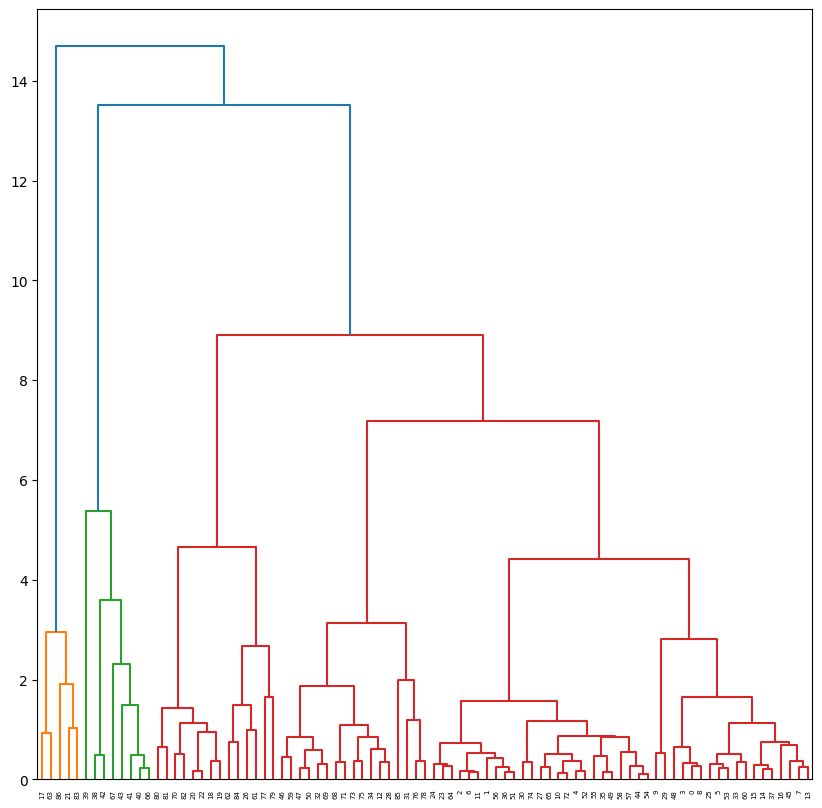

In [ ]:
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(link, labels= data.index.tolist())

Построим дендрограмму.

Вариант 2

Убираем автоматическое определение числа кластеров

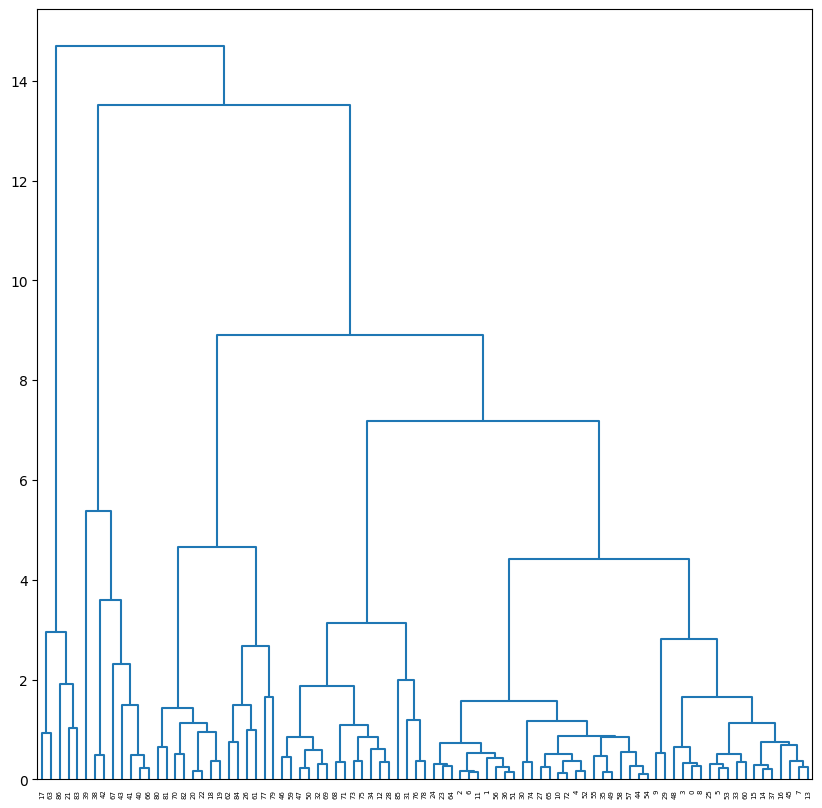

In [ ]:
fig = plt.figure(figsize=(10,10))

dn = dendrogram(link, color_threshold= -1,
                # массив с названиями объектов для подписи по оси Х
                labels= data.index.tolist())

Построим дендрограмму.

Вариант 3


Сами задаем порог для расстояния = 6, цветом выделяются полученные кластеры

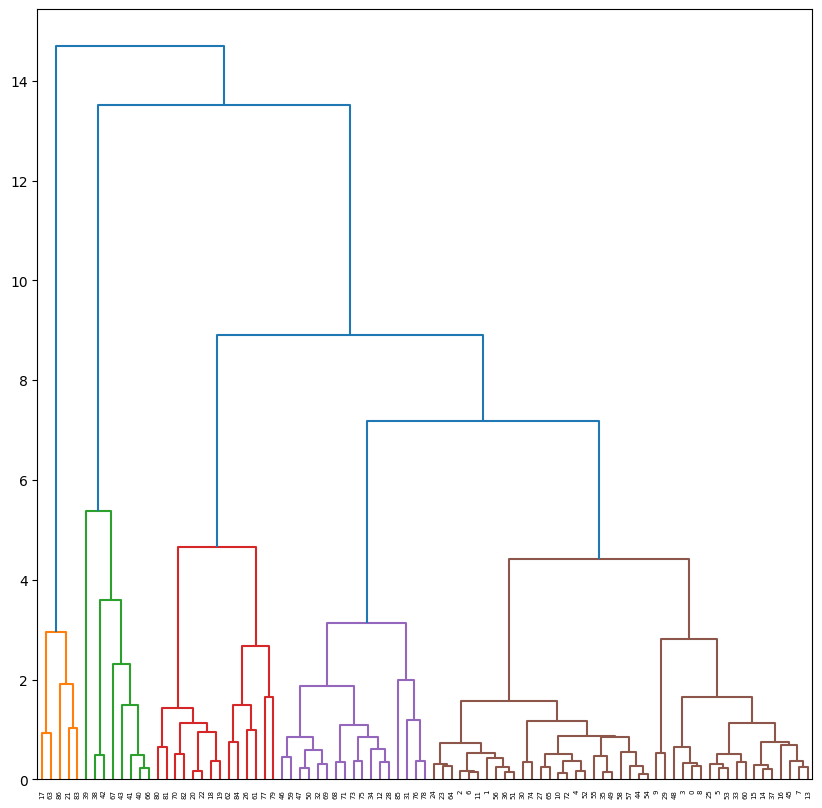

In [ ]:
fig = plt.figure(figsize=(10,10))

dn = dendrogram(link, color_threshold= 6,
                labels= data.index.tolist())


# еще варианты

#   dn = dendrogram(link, orientation='right')

#   dn = dendrogram(link, labels= data.index.tolist())

Добавим к таблице данных столбец, содержащий код того кластера, в который попал объект.

Это сделаем с помощью команды fcluster.

Первый аргумент команды это объект link, содержащий результаты кластеризации.
Третий аргумент criterion указывает как разбить на кластеры
(distance - если остановка объединений по расстоянию между кластерами
или maxclust - если будет задано число кластеров).

Второй аргумент является либо пороговым значением для расстояния между кластерами, либо количеством кластеров, в зависимости от значения аргумента criterion.

In [ ]:
#  Информация о кластерах добавляется в таблицу данных в виде нового стоблца

#  Останавливаем наблюдение  когда расстояние между кластерами превысит заданное значение
our_data_clean['cluster_i'] = fcluster(link, 6, criterion='distance')


# или так - Останавливаем наблюдение когда останется нужное нам количество кластеров
#   our_data_clean['cluster'] = fcluster(link, 5, criterion='maxclust')

In [ ]:
our_data_clean.groupby('cluster_i'). count()

,регион,федеральный_округ,средний_доход,%_ниже_среднего_дохода,мрот,%_ниже_мрот
cluster_i,,,,,,
1,5,5,5,5,5,5
2,8,8,8,8,8,8
3,14,14,14,14,14,14
4,17,17,17,17,17,17
5,43,43,43,43,43,43


In [ ]:
our_data_clean.groupby('cluster_i')[number_col].mean()

,средний_доход,%_ниже_среднего_дохода,мрот,%_ниже_мрот
cluster_i,,,,
1,82587.400000,7.380000,20193.200000,4.460000
2,21863.250000,22.750000,10608.875000,18.562500
3,43041.142857,13.028571,15588.190476,5.778571
4,24994.117647,18.041176,11318.470588,7.400000
5,29896.348837,11.527907,10641.627907,5.300000


Два способа посчитать количества наблюдений в кластерах:

In [ ]:
# 1
our_data_clean.groupby('cluster_i').size()

cluster_i
1     5
2     8
3    14
4    17
5    43
dtype: int64

In [ ]:
# 2
our_data_clean['cluster_i'].value_counts()

5    43
4    17
3    14
2     8
1     5
Name: cluster_i, dtype: int64

Посмотреть какие наблюдения попали в выбранный кластер:

In [ ]:
our_data_clean.query('cluster_i == 1')

,регион,федеральный_округ,средний_доход,%_ниже_среднего_дохода,мрот,%_ниже_мрот,cluster_i
17,г. Москва,Центральный федеральный округ,78106.0,6.0,17740.0,3.2,1
21,Ненецкий авт.округ,Северо-Западный федеральный округ,84171.0,9.4,21757.0,8.0,1
63,Ямало-Ненецкий авт.округ,Уральский федеральный округ,90130.0,4.8,16640.0,2.5,1
83,Магаданская область,Дальневосточный федеральный округ,70982.0,8.7,20830.0,6.3,1
86,Чукотский автономный округ,Дальневосточный федеральный округ,89548.0,8.0,23999.0,2.3,1


In [ ]:
# и их индексы
our_data_clean[our_data_clean['cluster_i'] == 1].index.values

array([17, 21, 63, 83, 86])

In [ ]:
# или еще вариант
(our_data_clean
 .pivot_table(index='регион',
              values=number_col.append('cluster_i')  # к уже готовому выше списку с числовыми колонками
                                                     # добавляем имя новосозданного выше столбика с кластерами
              )
 .query('cluster_i == 1')
 .index
 .values
 )

<ipython-input-56-c0d19b6ef16a>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  (our_data_clean


array(['Магаданская область', 'Ненецкий авт.округ',
       'Чукотский автономный округ', 'Ямало-Ненецкий авт.округ',
       'г. Москва'], dtype=object)

В дополнение - Построим график каменистой осыпи:

Этот график тоже помогает определить количество кластеров. Особенно полезен когда очень много данных. Будем использовать второй столбец матрицы link где хранятся расстояния между объединяемыми кластерами.

In [ ]:
dist = link[:,2]
dist

array([ 0.10702849,  0.12321194,  0.14126043,  0.14920948,  0.15549207,
        0.16033078,  0.16757918,  0.1731178 ,  0.21455996,  0.2237222 ,
        0.22868839,  0.23225701,  0.24779084,  0.24779603,  0.25467385,
        0.25933982,  0.26844148,  0.26978893,  0.29057177,  0.29861425,
        0.3146735 ,  0.31536134,  0.33295407,  0.33883196,  0.34023266,
        0.34132312,  0.34541656,  0.35653845,  0.36570276,  0.36656654,
        0.36888085,  0.37143118,  0.42451162,  0.44384226,  0.46580873,
        0.48685642,  0.49056211,  0.50244936,  0.50458495,  0.51112931,
        0.5316798 ,  0.53578863,  0.5471449 ,  0.59531868,  0.59761988,
        0.63858682,  0.64396018,  0.68524245,  0.731222  ,  0.74744289,
        0.74771274,  0.84258687,  0.84741511,  0.84992026,  0.85869893,
        0.93726535,  0.94054507,  0.98061657,  1.03019569,  1.08127936,
        1.13202123,  1.13365594,  1.16566301,  1.17951082,  1.42876248,
        1.48299731,  1.4850213 ,  1.56777347,  1.64549488,  1.64

На этом графике показывается зависимость расстояний между кластерами от шага объединения(обратного). На графике находим момент, начиная с которого расстояние перестанет значительно меняться.

Text(0, 0.5, 'Расстояние')

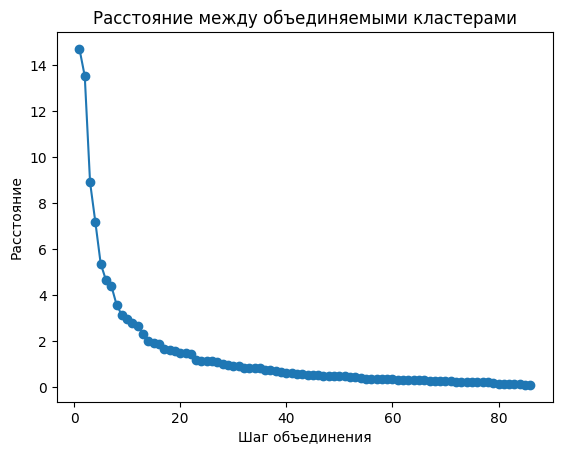

In [ ]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

In [ ]:
number_col

['средний_доход', '%_ниже_среднего_дохода', 'мрот', '%_ниже_мрот', 'cluster_i']

In [ ]:
our_data_clean.query('регион == "г.Санкт-Петербург"')

,регион,федеральный_округ,средний_доход,%_ниже_среднего_дохода,мрот,%_ниже_мрот,cluster_i
29,г.Санкт-Петербург,Северо-Западный федеральный округ,49375.0,5.9,11910.0,3.0,5


In [ ]:
# почистить немного лучше данные, избавиться от пробелов в названиях населенных пунктов между "г." как минимум.

### Кластеризация методом k-средних (k-means)

Загрузим нужную процедуру Kmeans из библиотеки sklearn

In [ ]:
from sklearn.cluster import KMeans

В scikit-learn процедура настройки и использования моделей часто проходит по одной и той же схеме:

1. Инициализация модели, задание её параметров.
2. Подгонка модели ( метод fit и\или fit_transform ).
3. Предсказание для новых наблюдений ( метод predict ).




Для кластеризации методом k-means необходимо задать число кластеров k

Попробуем его подобрать.

In [ ]:
# максимальное число итераций

max_iter_1 = 300

In [ ]:
# инициализация модели

model = KMeans(n_clusters=3, random_state=42, max_iter=max_iter_1, n_init=10, verbose=0, tol=0.0001)

# random_state - зерно датчика случайных чисел.
# При повторных вызоовах процедуры с тем же значением random_state
# модель будет выдавать одинаковые результаты

# n_init определяет сколько раз делать кластеризацию с разными начальными центрами кластеров, из этого числа будет выбрана одна лучшая и выдана в качестве решения (защищаемся от неудачного выбора начальных центров кластеров)

# verbose=0 предписывает не выдавать промежуточные результаты, т.к. обычно они не нужны в маленьких задачах

# tol=0.0001 установленный порог изменений значения w(общей дисперсии) при кластеризации


In [ ]:
# сама кластеризация

model.fit(data)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
# сколько итераций потребовалось процедуре

model.n_iter_

5

Пример разницы в максимальном числе итераций:

In [ ]:
max_iter_2 = 3

In [ ]:
# Если итерации пончились а алгоритм не успел завершить работу будет ли выданно сообщение об этом?

model_tmp = KMeans(n_clusters=5, random_state=42, max_iter=max_iter_2, n_init=10, verbose=0, tol=0.0001)

model_tmp.fit(data)

KMeans(max_iter=3, n_clusters=5, n_init=10, random_state=42)

In [ ]:
# Сообщение не появилось

model_tmp.n_iter_

3

Проверяем сошелся ли алгоритм KMeans:

In [ ]:
if model_tmp.n_iter_ == max_iter_2:
  print(f'Не сошлось за {model_tmp.n_iter_} итераций')
else:
  print(f'Сошлось за {model_tmp.n_iter_} итераций')

Не сошлось за 3 итераций


In [ ]:
# Все параметры и их значения по умолчанию

#   KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')

#  init= способ подбора начальных центров кластеров лишь два варианта k-means++ или случайный выбор, но k-means++ лучше на практике
#  algorithm='auto' Автоматический выбор варианта k-means, на самом деле под этим подразумевается выбор алгоритма лойда
#
#
#
#
#
#

Время спотреть на результаты:

In [ ]:
# Результат кластеризации набора данных из таблицы data
# номера кластеров начинаются с 0 а не с 1 как в иерархическом кластерном анализе


model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1],
      dtype=int32)

In [ ]:
# Координаты центров кластеров

model.cluster_centers_

array([[-0.25084354, -0.14784121, -0.29191679, -0.28149808],
       [ 2.21117011, -0.8347175 ,  2.29034799, -0.46896763],
       [-0.72891283,  1.70832466, -0.35781501,  2.13236536]])

Как определить число кластеров не угадывая?

применим модель для разного числа кластеров, чтобы построить график каменистой осыпи. Метод inertia_ вернет сумму квадратов расстояний от каждой точки данных до центра ближайшего к ней кластера. Кластеризацию будем считать условно хорошей, если инерция перестанет сильно уменьшаться при увеличении числа кластеров.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

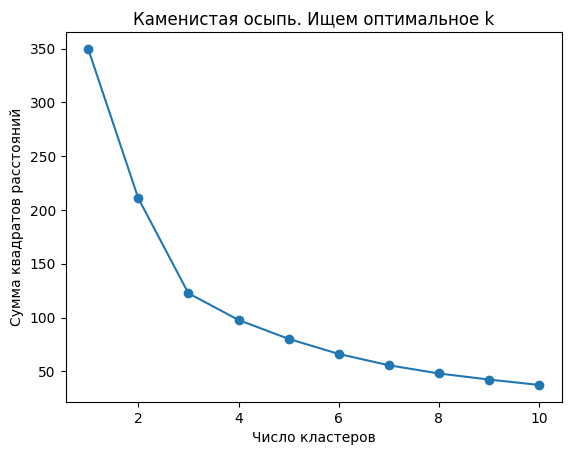

In [ ]:
K = range(1, 11)

# Вычисляем значения критерия качества для разного числа кластеров

models = [KMeans(n_clusters=k, random_state=42).fit(data) for k in K]

dist = [model.inertia_ for model in models]


# Строим график каменистая осыпь

plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь. Ищем оптимальное k')
plt.show()

Дпостим мы решили что излом над числом три.

Тогда три кластера - это оптимальный выбор.



!!!!!!!!!!! На практике в начале нужно построить график каменистой осыпи и потом уже кластеризовать !!!!!!!!!!!



Перейдем к интерпритации кластеров, посмотрим, чем они отличаются друг от друга. Для этого применим метод labels_ а затем посчитаем средние значения переменных для каждого кластера.

In [ ]:
our_data_clean['cluster_KM'] = model.labels_

our_data_clean.groupby('cluster_KM')[number_col].mean() # значения среднего совпадут
                                                        # с центрами кластеров model.cluster_centers_ при стандартизации
                                                        # и это нормально.

,средний_доход,%_ниже_среднего_дохода,мрот,%_ниже_мрот,cluster_i
cluster_KM,,,,,
0,29627.107692,13.101538,11164.794872,5.733846,4.538462
1,66100.727273,9.690909,18883.454545,4.918182,2.090909
2,22544.727273,22.318182,10967.818182,16.236364,2.545455


In [ ]:
our_data_clean.groupby('cluster_KM').size()

cluster_KM
0    65
1    11
2    11
dtype: int64

In [ ]:
our_data_clean.query('cluster_KM == 2')

,регион,федеральный_округ,средний_доход,%_ниже_среднего_дохода,мрот,%_ниже_мрот,cluster_i,cluster_KM
31,Республика Калмыкия,Южный федеральный округ,19816.0,22.7,10443.0,9.3,4,2
38,Республика Дагестан,Северо-Кавказский федеральный округ,27666.0,14.8,10465.0,16.5,2,2
39,Республика Ингушетия,Северо-Кавказский федеральный округ,16877.0,30.0,10353.0,32.6,2,2
40,Кабардино-Балкарская Республика,Северо-Кавказский федеральный округ,22016.0,24.2,11311.0,16.0,2,2
41,Карачаево-Черкесская Республика,Северо-Кавказский федеральный округ,19101.0,23.2,10277.0,14.8,2,2
42,Республика Северная Осетия - Алания,Северо-Кавказский федеральный округ,23963.0,13.9,9854.0,15.1,2,2
43,Чеченская Республика,Северо-Кавказский федеральный округ,24625.0,20.4,11240.0,19.7,2,2
66,Республика Алтай,Сибирский федеральный округ,21683.0,23.8,10697.0,15.7,2,2
67,Республика Тыва,Сибирский федеральный округ,18975.0,31.7,10674.0,18.1,2,2
76,Республика Бурятия,Дальневосточный федеральный округ,26222.0,19.9,12333.0,10.8,4,2


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
УТОЧНЕНИЕ
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

если после кластеризации в таблице появляются новые данные, то есть два варианта:

1. Идеально будет произвести кластеризацию с самого начала и получить новые кластеры

2. Но иногда данные добавляются слишком часто, тогда можно воспользоваться функцией написанной ниже и присвоить этим данным временные кластеры на основе предсказаний функции, а первый пункт выполнять систематически, например раз в месяц когда уже будет призведена идеальная кластеризация.
Второй пункт считается по правилу - ищется расстояние от нового объекта до центра каждого кластера и новый объект приписывается к тому кластеру чей центр к нему ближе всех.


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
# записываем в новую переменную наши новые данные

#          new_d = []

# помещаем их в нашу функцию

#        model.predict(new_d)

### Кластеризация методом DBSCAN

Подгружаем библиотеку:

In [ ]:
from sklearn.cluster import DBSCAN

Подбираем параметры модели DBSCAN. Первый шаг.

Начнем со значений параметров по умолчанию

In [ ]:
dbscan_1 = DBSCAN()

# Обучим модель DBSCAN

dbscan_1.fit(data)

#  В какой кластер попало наблюдение?
#  Numpy массив номеров кластеров

dbscan_1.labels_


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,
       -1, -1, -1, -1, -1, -1,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1, -1,  0,  0, -1, -1,
        0,  0, -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1])

In [ ]:
#   dbscan_1? # Вызов справки

Кластеризуем со значениями по умолчанию (более подробная запись)


eps - длинна окружности, со значениями вычисленными в (metric) евклидовом пространстве, где число соседних точек равно min_samples(их число нужно брать логически посмотрев на количество наблюдений)

In [ ]:
dbscan_1 = DBSCAN(eps=0.5, metric='euclidean', min_samples=5)

dbscan_1.fit(data)

dbscan_1.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,
       -1, -1, -1, -1, -1, -1,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1, -1,  0,  0, -1, -1,
        0,  0, -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1])

Представим результаты кластеризации с помощью Таблицы частот в pandas

In [ ]:
#  Команда value_counts() работает с таблицами

#  Поэтому предварительно надо матрицу преобразовать в таблицу

table_ = pd.value_counts(pd.Series(dbscan_1.labels_))
table_.sort_index(inplace=True)

print(table_)

-1    36
 0    51
dtype: int64


Второй вариант - Создадим такую же Таблицу частот только с помощью numpy

In [ ]:
unique, counts = np.unique(dbscan_1.labels_, return_counts=True)

print(np.asarray((unique, counts)).T)

[[-1 36]
 [ 0 51]]


В кластер с названием (-1) попали все выбросы.

Подбираем параметры
Шаг 2

увеличим значение окружности eps

In [ ]:
dbscan_1 = DBSCAN(eps=5, metric='euclidean', min_samples=5)

dbscan_1.fit(data)


DBSCAN(eps=5)

In [ ]:
# Таблица частот будет выглядеть так

table_ = pd.value_counts(pd.Series(dbscan_1.labels_))
table_.sort_index(inplace=True)

print(table_)

0    87
dtype: int64


Примечание к результату в строчке кода выше -  Все объекты попали в один кластер, что тоже совершенно не хорошо

Продолжаем уменьшать значение окружности eps

In [ ]:
dbscan_1 = DBSCAN(eps=2.1, metric='euclidean', min_samples=5)

dbscan_1.fit(data)

table_ = pd.value_counts(pd.Series(dbscan_1.labels_))
table_.sort_index(inplace=True)

print(table_)

-1     1
 0    86
dtype: int64


Попробуем уменьшить количество ближайших соседей min_samples

In [ ]:
dbscan_1 = DBSCAN(eps=2.1, metric='euclidean', min_samples=3)

dbscan_1.fit(data)

table_ = pd.value_counts(pd.Series(dbscan_1.labels_))
table_.sort_index(inplace=True)

print(table_)

-1     1
 0    86
dtype: int64


Судя по результатам продолжаем уменьшать значение окружности eps

In [ ]:
dbscan_1 = DBSCAN(eps=1.1, metric='euclidean', min_samples=3)

dbscan_1.fit(data)

table_ = pd.value_counts(pd.Series(dbscan_1.labels_))
table_.sort_index(inplace=True)

print(table_)

# P.S. Чуть лучше, но все равно хрень

-1    15
 0    69
 1     3
dtype: int64


Ниже будет ячейка для тестов подбора параметров

In [ ]:
dbscan_2 = DBSCAN(eps=0.9, metric='euclidean', min_samples=3, algorithm='brute')

#  algorithm='brute'  Добавляет требование полного перебора, это значит что при вычислениях используется полный перебор

dbscan_2.fit(data)

table_ = pd.value_counts(pd.Series(dbscan_2.labels_))
table_.sort_index(inplace=True)

print(table_)

-1    19
 0    65
 1     3
dtype: int64


### !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Сарвнение кластеризаций с помощью Таблиц сопряженности
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
# Создадим таблицу с результатами разных кластеризаций

res_ = pd.DataFrame()

res_['dbscan'] = dbscan_1.labels_
res_['ierarh'] = fcluster(link, 6, criterion='distance')
res_['kmeans'] = model.labels_

res_.head()

,dbscan,ierarh,kmeans
0,0,5,0
1,0,5,0
2,0,5,0
3,0,5,0
4,0,5,0


Теперь сделаем таблицу сопряжонности для двух  кластеризаций, где по горизонтали будут результаты одной кластеризации (в первом примере ниже это dbscan), а по вертикали другой ( ierarh в том же примере) и посмотрим как распределились данные в разных кластерах

In [ ]:
tab_ = pd.crosstab(res_['dbscan'], res_['ierarh'])

tab_

ierarh,1,2,3,4,5
dbscan,,,,,
-1,5,5,2,1,2
0,0,0,12,16,41
1,0,3,0,0,0


Сделаем такую же табличку для сравнения других двух кластеризаций

In [ ]:
tab_1 = pd.crosstab(res_['ierarh'], res_['kmeans'])

tab_1


# Видим что первый кластер в кластеризации kmeans впитал в себя данные их двух кластеров (1 и 3) иерархической кластеризации

# Так же во втором кластере (при kmeans ) присутствуют результаты из 2 и 4 (иерархической кластеризации)

kmeans,0,1,2
ierarh,,,
1,0,5,0
2,0,0,8
3,8,6,0
4,14,0,3
5,43,0,0


Можно было и не создавать новую табличку, а написать просто как в строчке ниже

In [ ]:
tab_2 = pd.crosstab(our_data_clean['cluster_i'], our_data_clean['cluster_KM'])

tab_2

cluster_KM,0,1,2
cluster_i,,,
1,0,5,0
2,0,0,8
3,8,6,0
4,14,0,3
5,43,0,0


Или еще проще

In [ ]:
tab_3 = pd.crosstab(fcluster(link, 6, criterion='distance'), model.labels_)

tab_3

col_0,0,1,2
row_0,,,
1,0,5,0
2,0,0,8
3,8,6,0
4,14,0,3
5,43,0,0


### !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Есть еще Silhouette для автоматического определения значений параметров !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Активируем процедуру измерения качества кластеризации

In [ ]:
from sklearn import metrics

И создадим списки тех значений параметров, которые собираемся перебирать

In [ ]:
eps_1 = [0.95, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4]

min_samples_1 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25]

In [ ]:
# Готовимся к циклу

sil_avg = []

# Для сохранения наилучшего набора параметров

max_value = [0, 0, 0, -1]

Пишем наш цикл

In [ ]:
# Перебираем все значения параметров
# И сохраняем лучшее решение


from sklearn.metrics.cluster import silhouette_samples
for i in range(len(eps_1)):
  for j in range(len(min_samples_1)):
    db = DBSCAN(min_samples=min_samples_1[j], eps=eps_1[i]).fit(data)
    labels = db.labels_

# Число кластеров, после отбрасывания выбросов.

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Число выбросов
# n_noise_ = list(labels).count(-1)

    if n_clusters_ > 1:
# Если число кластеров больше одного, то
      silhouette_avg = metrics.silhouette_score(data, labels)

# И чем больше значение силуэта, тем лучше кластеризация
      if silhouette_avg > max_value[3]:
# Если все ок, то переписываем наши параметры в переменную
        max_value = (eps_1[i], min_samples_1[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

# И выводим результат нашего цикла на экран
print('epsilon = ', max_value[0],
      '\nmin_sample = ', max_value[1],
      '\nnumber of clusters = ', max_value[2],
      '\nnaverage silhouette score = %.4f' % max_value[3])

epsilon =  1.25 
min_sample =  3 
number of clusters =  2 
naverage silhouette score = 0.4542


Подставим результаты нашей функции в кластеризацию

In [ ]:
# переберем даже полным перебором с algorithm='brute'
dbscan_S = DBSCAN(eps=max_value[0], metric='euclidean', min_samples=max_value[1], algorithm='brute')

dbscan_S.fit(data)

table_ = pd.value_counts(pd.Series(dbscan_S.labels_))
table_.sort_index(inplace=True)

print(table_)

-1    12
 0    71
 1     4
dtype: int64


Вывод - Кластеризация методом DBSCAN хороша в основном для ленточных кластеров, но не в нашем примере, так же метод силуэт не всегда выдает оптимальные результаты и это необходимо иметь ввиду, т.к. ленточные кластеры не всегда компактны и значение силуэта может быть вообще отрицательным или близким к нулю, а у силуэта чем больше значение - тем лучше кластеризация в итоге силуэт может посчитать плохой кластеризацией ту, в которой будет найден хороший ленточный кластер.
Получается что силуэт пригоден лишь для плотных кластеров, но не для ленточных.